### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#print(numpy.__version__,sns.__version__)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

2. Investigate the dataset for missing or problematic data.

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
data.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
10031,Work,Alone,Snowy,30,7AM,Carry out & Take away,1d,Male,26,Single,...,4~8,1~3,4~8,1~3,1,1,0,1,0,1
12210,Home,Alone,Rainy,55,10PM,Coffee House,2h,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,0,0,1,0,0
11514,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,below21,Single,...,1~3,less1,4~8,gt8,1,0,0,0,1,0
5817,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,1d,Male,31,Married partner,...,less1,4~8,less1,less1,1,1,0,0,1,1
2207,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,36,Married partner,...,never,4~8,4~8,1~3,1,1,0,0,1,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [7]:
print(data.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [8]:
#Numerical Descriptive stats
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Categorical Descriptive Stats
data.describe(include = ['object', 'category']) 

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,108,12577,12467,12533,12554,12495
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1
freq,6283,7305,10069,3230,3996,7091,6511,2653,5100,4351,1870,2013,22,5197,3385,4672,5376,6077


3. Decide what to do about your missing data -- drop, replace, other...

In [10]:
#Filled missing car column data with unknowns
data['car'] = data['car'].fillna('Unknown')

#Filled in missing visit columns data
visit_columns = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
data[visit_columns] = data[visit_columns].fillna('Never')

#Check if missing values still exist
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [11]:
proportions = data['Y'].value_counts(normalize=True)
print(proportions)

Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64


In [12]:
# Nearly 57% of the observations chose to accept the coupon

5. Use a bar plot to visualize the `coupon` column.

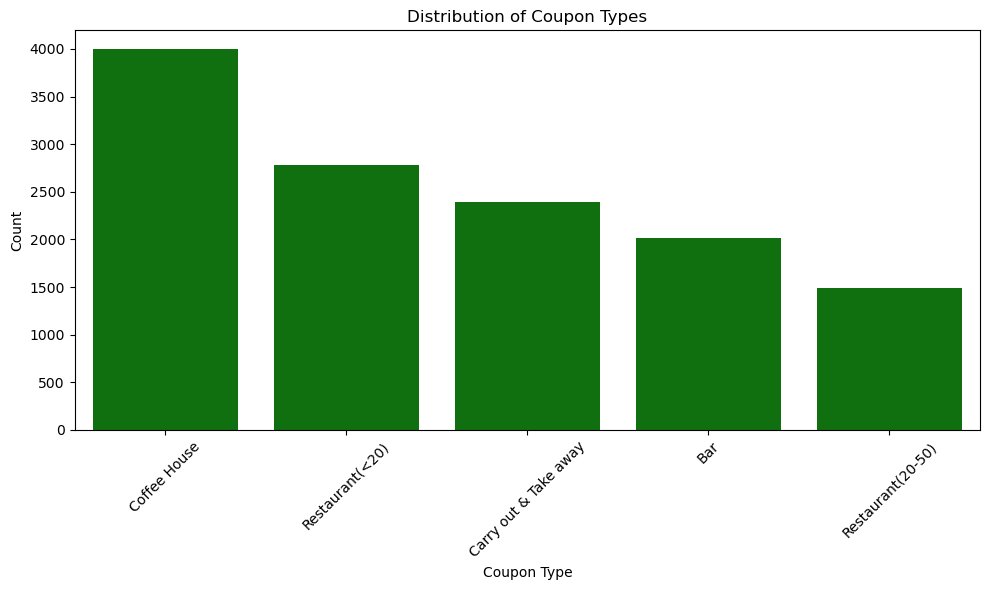

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data, x='coupon', order=data['coupon'].value_counts().index, color = 'green')
# Add labels and title
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/coupon_barplot.png', dpi=300)
# Show the plot
plt.show()
#this show us that coffee coupons were much more common than other types

6. Use a histogram to visualize the temperature column.

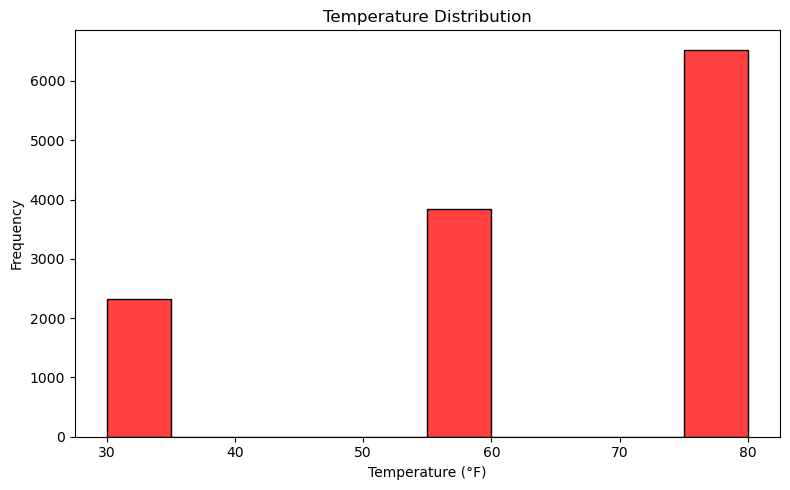

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(data['temperature'], bins=10, kde=False , color = 'red')
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig('images/temp_hist.png', dpi=300)
plt.show()
#this let's us know that most of these offers were sent while the weather was particularly warm

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [15]:
bar_data = data[data['coupon'] == 'Bar']

In [16]:
bar_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,Never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,Never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,Never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [17]:
bar_proportions = bar_data['Y'].value_counts(normalize=True)
print(bar_proportions)
#It appears that the bar coupons were accepted 41% of the time

Y
0    0.589985
1    0.410015
Name: proportion, dtype: float64


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [18]:
# Define visit frequency categories
less_visits = ['never', 'less1', '1~3']
more_visits = ['4~8', 'gt8']

# Create boolean masks
low_bar_users = bar_data['Bar'].isin(less_visits)
high_bar_users = bar_data['Bar'].isin(more_visits)

# Calculate acceptance rates
low_bar_acceptance = bar_data.loc[low_bar_users, 'Y'].mean()
high_bar_acceptance = bar_data.loc[high_bar_users, 'Y'].mean()

# Print results
print(f"Acceptance Rate (≤ 3 bar visits/month): {low_bar_acceptance:.2%}")
print(f"Acceptance Rate (> 3 bar visits/month): {high_bar_acceptance:.2%}")

#Patrons who visited bars more than 3 times a month were much more likely to accept the bar coupon

Acceptance Rate (≤ 3 bar visits/month): 37.06%
Acceptance Rate (> 3 bar visits/month): 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [19]:
# Defined the bar frequency and age thresholds first
bar_more_than_once = ['1~3', '4~8', 'gt8']
age_over_25 = ['26-30', '31-35', '36-40', '41-45', '46-50', '50plus']

# Then created  Boolean mask for Group A
group_a_mask = (bar_data['Bar'].isin(bar_more_than_once)) & (bar_data['age'].isin(age_over_25))

# Group A: Drivers who go to bars more than once a month AND are over 25
group_a = bar_data[group_a_mask]

# Group B: Everyone else
group_b = bar_data[~group_a_mask]

# Compute acceptance rates
group_a_rate = group_a['Y'].mean()
group_b_rate = group_b['Y'].mean()

print(f"Acceptance Rate (Bar > once/month and Age > 25): {group_a_rate:.2%}")
print(f"Acceptance Rate (All Others): {group_b_rate:.2%}")

#There is a 27 percent difference in acceptance rate between all others and those over 25 who visit bars at least once a month

Acceptance Rate (Bar > once/month and Age > 25): 67.16%
Acceptance Rate (All Others): 40.10%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [20]:
# Define filters
bar_more_than_once = ['1~3', '4~8', 'gt8']
non_kid_passenger = bar_data['passanger'] != 'Kid(s)'
non_farm_occupation = bar_data['occupation'] != 'Farming & Fishing & Forestry'

# Create Group A mask
group_a_mask = (bar_data['Bar'].isin(bar_more_than_once)) & non_kid_passenger & non_farm_occupation

# Apply filters
group_a = bar_data[group_a_mask]
group_b = bar_data[~group_a_mask]

# Calculate acceptance rates
group_a_rate = group_a['Y'].mean()
group_b_rate = group_b['Y'].mean()

print(f"Acceptance Rate (Goes to bar > once/month, passenger not a kid, not in farming/fishing/forestry): {group_a_rate:.2%}")
print(f"Acceptance Rate (All Others): {group_b_rate:.2%}")

Acceptance Rate (Goes to bar > once/month, passenger not a kid, not in farming/fishing/forestry): 71.32%
Acceptance Rate (All Others): 29.60%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [21]:
# Group A conditions 
group_a_mask = (
    ((bar_data['Bar'].isin(['1~3', '4~8', 'gt8'])) &
     (bar_data['passanger'] != 'Kid(s)') &
     (bar_data['maritalStatus'] != 'Widowed'))
    |
    ((bar_data['Bar'].isin(['1~3', '4~8', 'gt8'])) &
     (bar_data['age'].isin(['below21', '21-25', '26-30'])))
    |
    ((bar_data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
     (bar_data['income'].isin([
         'Less than $12500', '$12500 - $24999',
         '$25000 - $37499', '$37500 - $49999'
     ])))
)

# Group assignment
group_a = bar_data[group_a_mask]
group_b = bar_data[~group_a_mask]

# Acceptance rates
group_a_rate = group_a['Y'].mean()
group_b_rate = group_b['Y'].mean()

print(f"Acceptance Rate (Group A - meets any condition): {group_a_rate:.2%}")
print(f"Acceptance Rate (Group B - all others): {group_b_rate:.2%}")

Acceptance Rate (Group A - meets any condition): 58.81%
Acceptance Rate (Group B - all others): 29.96%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [22]:
#lower income younger drivers with no kids present were more likely to accept the bar coupons

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [23]:
#Carryout Coupons
carryout_data = data[data['coupon'] == 'Carry out & Take away'].copy()
# Group by passenger and calculated mean acceptance (Y)
acceptance_by_passenger = carryout_data.groupby('passanger')['Y'].mean().sort_values(ascending=False)
print(acceptance_by_passenger)

passanger
Friend(s)    0.757781
Partner      0.731959
Alone        0.727402
Kid(s)       0.703947
Name: Y, dtype: float64


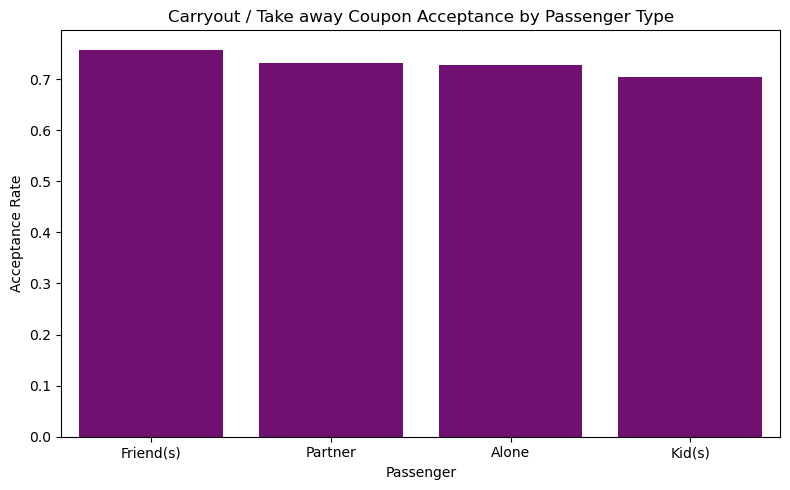

In [24]:
#Bar plot for Carryout data
plt.figure(figsize=(8, 5))
sns.barplot(x=acceptance_by_passenger.index, y=acceptance_by_passenger.values , errorbar=("ci", 95), color = 'purple')
plt.title("Carryout / Take away Coupon Acceptance by Passenger Type")
plt.xlabel("Passenger")
plt.ylabel("Acceptance Rate")
plt.tight_layout()
plt.savefig('images/barplt_carryout_passengers.png', dpi=300)
plt.show()

#it looks like carryout coupons had high acceptance rates regardless of the passenger type

In [25]:
#Restaurant20To50 coupons
Restaurant20To50_data = data[data['coupon'] == 'Restaurant(20-50)'].copy()
# Group by passenger and calculate mean acceptance (Y)
acceptance_by_passenger2 = Restaurant20To50_data.groupby('passanger')['Y'].mean().sort_values(ascending=False)
print(acceptance_by_passenger2)

# it seems like people were more likely to "splurge" on a meal when presented with a coupon while driving with their partner compared to other passenger types

passanger
Partner      0.631206
Friend(s)    0.464286
Alone        0.422200
Kid(s)       0.373563
Name: Y, dtype: float64


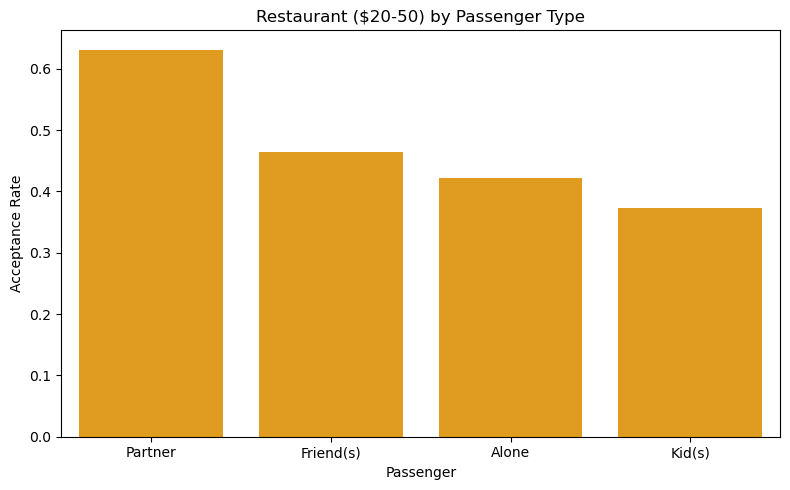

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(x=acceptance_by_passenger2.index, y=acceptance_by_passenger2.values , errorbar=("ci", 95),err_kws={'color': 'black', 'linewidth': 2}, color = 'orange')
plt.title("Restaurant ($20-50) by Passenger Type")
plt.xlabel("Passenger")
plt.ylabel("Acceptance Rate")
plt.tight_layout()
plt.savefig('images/barplt_20-50_passengers.png', dpi=300)
plt.show()
